In [1]:
#import libraries
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [2]:
#read dataset
tele_churn  = pd.read_csv("C:/Users/91779/Desktop/telecom_churn_data.csv")
tele_churn.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [3]:
#check shape
tele_churn.shape

(99999, 226)

In [4]:
# decribe dataset
tele_churn.describe

<bound method NDFrame.describe of        mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
0         7000842753        109             0.0             0.0   
1         7001865778        109             0.0             0.0   
2         7001625959        109             0.0             0.0   
3         7001204172        109             0.0             0.0   
4         7000142493        109             0.0             0.0   
5         7000286308        109             0.0             0.0   
6         7001051193        109             0.0             0.0   
7         7000701601        109             0.0             0.0   
8         7001524846        109             0.0             0.0   
9         7001864400        109             0.0             0.0   
10        7000471350        109             0.0             0.0   
11        7002006969        109             0.0             0.0   
12        7001419799        109             0.0             0.0   
13        7002191713        

In [5]:
#check for null values
tele_churn.isnull().sum()

mobile_number               0
circle_id                   0
loc_og_t2o_mou           1018
std_og_t2o_mou           1018
loc_ic_t2o_mou           1018
last_date_of_month_6        0
last_date_of_month_7      601
last_date_of_month_8     1100
last_date_of_month_9     1659
arpu_6                      0
arpu_7                      0
arpu_8                      0
arpu_9                      0
onnet_mou_6              3937
onnet_mou_7              3859
onnet_mou_8              5378
onnet_mou_9              7745
offnet_mou_6             3937
offnet_mou_7             3859
offnet_mou_8             5378
offnet_mou_9             7745
roam_ic_mou_6            3937
roam_ic_mou_7            3859
roam_ic_mou_8            5378
roam_ic_mou_9            7745
roam_og_mou_6            3937
roam_og_mou_7            3859
roam_og_mou_8            5378
roam_og_mou_9            7745
loc_og_t2t_mou_6         3937
                        ...  
arpu_2g_9               74077
night_pck_user_6        74846
night_pck_

In [6]:
#calculating values and rounding them 
round((tele_churn.isnull().sum()/len(tele_churn.index))*100,2).sort_values(axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last')

count_rech_2g_6             74.85
date_of_last_rech_data_6    74.85
count_rech_3g_6             74.85
av_rech_amt_data_6          74.85
max_rech_data_6             74.85
total_rech_data_6           74.85
arpu_3g_6                   74.85
arpu_2g_6                   74.85
night_pck_user_6            74.85
fb_user_6                   74.85
arpu_3g_7                   74.43
count_rech_2g_7             74.43
fb_user_7                   74.43
count_rech_3g_7             74.43
arpu_2g_7                   74.43
av_rech_amt_data_7          74.43
max_rech_data_7             74.43
night_pck_user_7            74.43
total_rech_data_7           74.43
date_of_last_rech_data_7    74.43
night_pck_user_9            74.08
date_of_last_rech_data_9    74.08
fb_user_9                   74.08
arpu_2g_9                   74.08
max_rech_data_9             74.08
arpu_3g_9                   74.08
total_rech_data_9           74.08
av_rech_amt_data_9          74.08
count_rech_3g_9             74.08
count_rech_2g_

In [7]:
#total recharge amount is to be used for HVC Filter
#recharge info
total_recharge_cols = [col for col in tele_churn.columns if 'total_rech_' in col]
print(total_recharge_cols)

['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_num_9', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'total_rech_amt_9', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9']


In [8]:
#Derive Total Data Recharge Amounts
tele_churn["total_recharge_data_amt_6"] = tele_churn["total_rech_data_6"]  * tele_churn['av_rech_amt_data_6']
tele_churn["total_recharge_data_amt_7"] = tele_churn["total_rech_data_7"]  * tele_churn['av_rech_amt_data_7']
tele_churn["total_recharge_data_amt_8"] = tele_churn["total_rech_data_8"]  * tele_churn['av_rech_amt_data_8']
tele_churn["total_recharge_data_amt_9"] = tele_churn["total_rech_data_9"]  * tele_churn['av_rech_amt_data_9']

In [9]:
#  Drop useless columns
drop_columns = ["total_rech_data_6", "total_rech_data_7", "total_rech_data_8", "total_rech_data_9", 
                'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9']
tele_churn.drop(drop_columns, axis=1, inplace=True)


In [10]:
#Avg of Recharge Amt in 6 and 7 Month
avg_recharge_6and7 = (tele_churn["total_rech_amt_6"].fillna(0) + tele_churn["total_recharge_data_amt_6"].fillna(0) + 
tele_churn["total_rech_amt_7"].fillna(0) + tele_churn["total_recharge_data_amt_7"].fillna(0))/2.0

#70th Percentile of Avg Recharge Amt
pc70_6and7 = np.percentile(avg_recharge_6and7, 70.0)
print('70 %tile of 6th and 7th months average recharge amount: ', pc70_6and7)

high_value_cust = tele_churn[avg_recharge_6and7 >= pc70_6and7]
print('Dataframe Shape now: ', high_value_cust.shape)

70 %tile of 6th and 7th months average recharge amount:  478.0
Dataframe Shape now:  (30001, 222)


# data cleaning

In [11]:
#Remove column which has only 1 unique Value as it won't give any insight
column_drop_list = high_value_cust.loc[:,high_value_cust.apply(pd.Series.nunique) == 1]
high_value_cust = high_value_cust.loc[:,high_value_cust.apply(pd.Series.nunique) != 1]

In [12]:
#rename columns to meaningfull names
high_value_cust.rename(columns={'jun_vbc_3g': 'vbc_3g_6', 'jul_vbc_3g': 'vbc_3g_7', 'aug_vbc_3g': 'vbc_3g_8', 'sep_vbc_3g': 'vbc_3g_9'}, inplace=True)

In [13]:
#change columns to integers, floats or other types if possible and meaningfull
col_data = high_value_cust.select_dtypes(include=['object'])
col_data.iloc[0]

date_of_last_rech_6         6/21/2014
date_of_last_rech_7         7/16/2014
date_of_last_rech_8          8/8/2014
date_of_last_rech_9         9/28/2014
date_of_last_rech_data_6    6/21/2014
date_of_last_rech_data_7    7/16/2014
date_of_last_rech_data_8     8/8/2014
date_of_last_rech_data_9          NaN
Name: 0, dtype: object

In [14]:
# convert to datetime
for column in col_data.columns:
    high_value_cust[column] = pd.to_datetime(high_value_cust[column])

high_value_cust.shape

(30001, 206)

In [15]:
#Drop Columns with greater than 30% of missing values but not for 9th Month
percent_missing = high_value_cust.isnull().sum() * 100 / len(high_value_cust)
missing_value_data = pd.DataFrame({'column_name': high_value_cust.columns,'percent_missing': percent_missing})

drop_col = missing_value_data.loc[(missing_value_data["column_name"].str.contains('_9')==False) & (missing_value_data["percent_missing"] > 30.0)]["column_name"]
high_value_cust.drop(drop_col, axis=1, inplace=True)
high_value_cust.shape

(30001, 179)

In [16]:
#Find Columns with Unique Value but Insignificant Frequency
for column in high_value_cust.columns:
    if (len(high_value_cust[column].unique()) <= 8):
        print(high_value_cust[column].value_counts())
        print(f"\n{35 * '-'}")

0.0    14952
1.0      268
Name: night_pck_user_9, dtype: int64

-----------------------------------
0    25394
1     4021
2      551
3       28
4        7
Name: monthly_2g_6, dtype: int64

-----------------------------------
0    25241
1     4071
2      649
3       33
4        5
5        2
Name: monthly_2g_7, dtype: int64

-----------------------------------
0    25854
1     3737
2      370
3       30
4        8
5        2
Name: monthly_2g_8, dtype: int64

-----------------------------------
0    26445
1     3175
2      346
3       30
4        5
Name: monthly_2g_9, dtype: int64

-----------------------------------
1.0    13564
0.0     1656
Name: fb_user_9, dtype: int64

-----------------------------------


In [17]:
#Drop highly correlated  values
correlation = high_value_cust.corr()
correlation.loc[:,:] = np.tril(correlation, k=-1)
correlation = correlation.stack()
correlation[(correlation > 0.60) | (correlation < -0.60)].sort_values()
drop_column = ['loc_og_t2m_mou_6','std_og_t2t_mou_6','std_og_t2t_mou_7','std_og_t2t_mou_8','std_og_t2t_mou_9','std_og_t2m_mou_6',
                'std_og_t2m_mou_7','std_og_t2m_mou_8','std_og_t2m_mou_9','total_og_mou_6','total_og_mou_7','total_og_mou_8',
                'loc_ic_t2t_mou_6','loc_ic_t2t_mou_7','loc_ic_t2t_mou_8','loc_ic_t2t_mou_9','loc_ic_t2m_mou_6','loc_ic_t2m_mou_7','loc_ic_t2m_mou_8','loc_ic_t2m_mou_9',
                'std_ic_t2m_mou_6','std_ic_t2m_mou_7','std_ic_t2m_mou_8','std_ic_t2m_mou_9','total_ic_mou_6','total_ic_mou_7','total_ic_mou_8',
                'total_rech_amt_6','total_rech_amt_7','total_rech_amt_8','total_rech_amt_9','arpu_2g_9','count_rech_2g_9','count_rech_3g_9','vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8',
                'loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2t_mou_8','loc_og_t2t_mou_9','loc_og_t2f_mou_6','loc_og_t2f_mou_7','loc_og_t2f_mou_8','loc_og_t2f_mou_9',
                'loc_og_t2m_mou_6','loc_og_t2m_mou_7','loc_og_t2m_mou_8','loc_og_t2m_mou_9','loc_ic_t2f_mou_6','loc_ic_t2f_mou_7','loc_ic_t2f_mou_8','loc_ic_t2f_mou_9',
                'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8']
                 
high_value_cust.drop(drop_column, axis=1, inplace=True)

In [18]:
high_value_cust.shape

(30001, 124)

In [19]:
# tag churners

In [20]:
high_value_cust[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].head()

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
0,0.00,0.00,0.00,0.00
7,0.00,0.00,0.00,0.00
8,34.91,142.18,0.00,0.00
21,252.61,1031.53,0.00,0.00
23,127.48,127.63,13.93,314.74


In [21]:
#churned customers
high_value_cust['churn'] = np.where(high_value_cust[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].sum(axis=1) == 0,1,0)

In [22]:
high_value_cust['churn'].head()

0     1
7     1
8     0
21    0
23    0
Name: churn, dtype: int32

In [23]:
#Remove All 9th Month columns
drop_cols = [col for col in high_value_cust.columns if '_9' in col]
drop_cols

['arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2f_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'max_rech_amt_9',
 'date_of_last_rech_9',
 'last_day_rch_amt_9',
 'date_of_last_rech_data_9',
 'max_rech_data_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'arpu_3g_9',
 'night_pck_user_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 'sachet_3g_9',
 'fb_user_9',
 'vbc_3g_9',
 'total_recharge_data_amt_9']

In [24]:
high_value_cust.drop(drop_cols, axis=1, inplace=True)
high_value_cust.shape

(30001, 87)

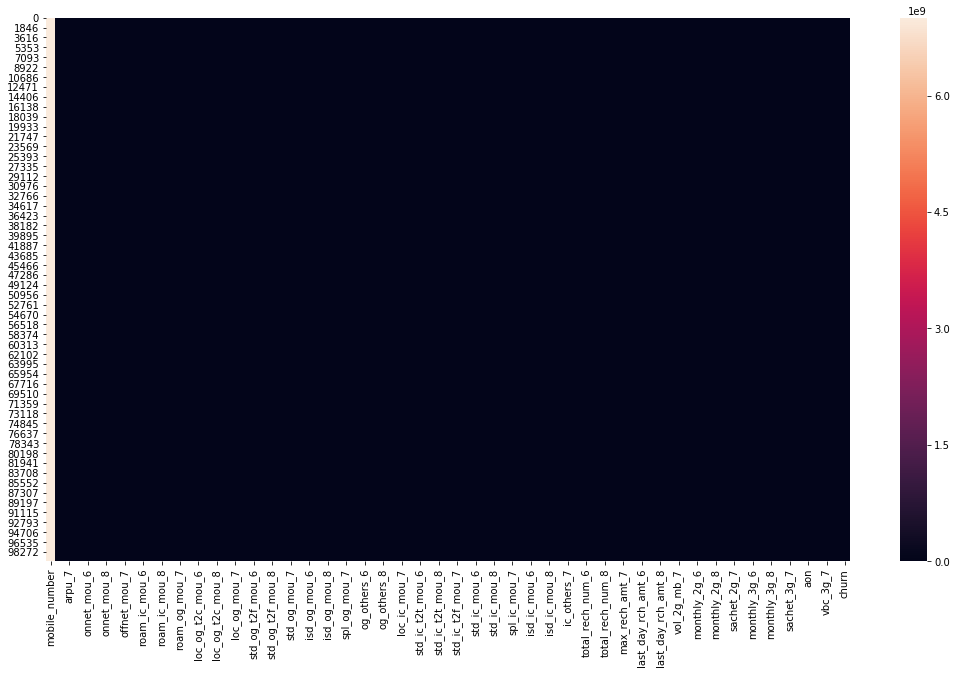

In [25]:
plt.figure(figsize=(18, 10))
sns.heatmap(high_value_cust)

In [26]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [27]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = "Telecom Churn"
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [28]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

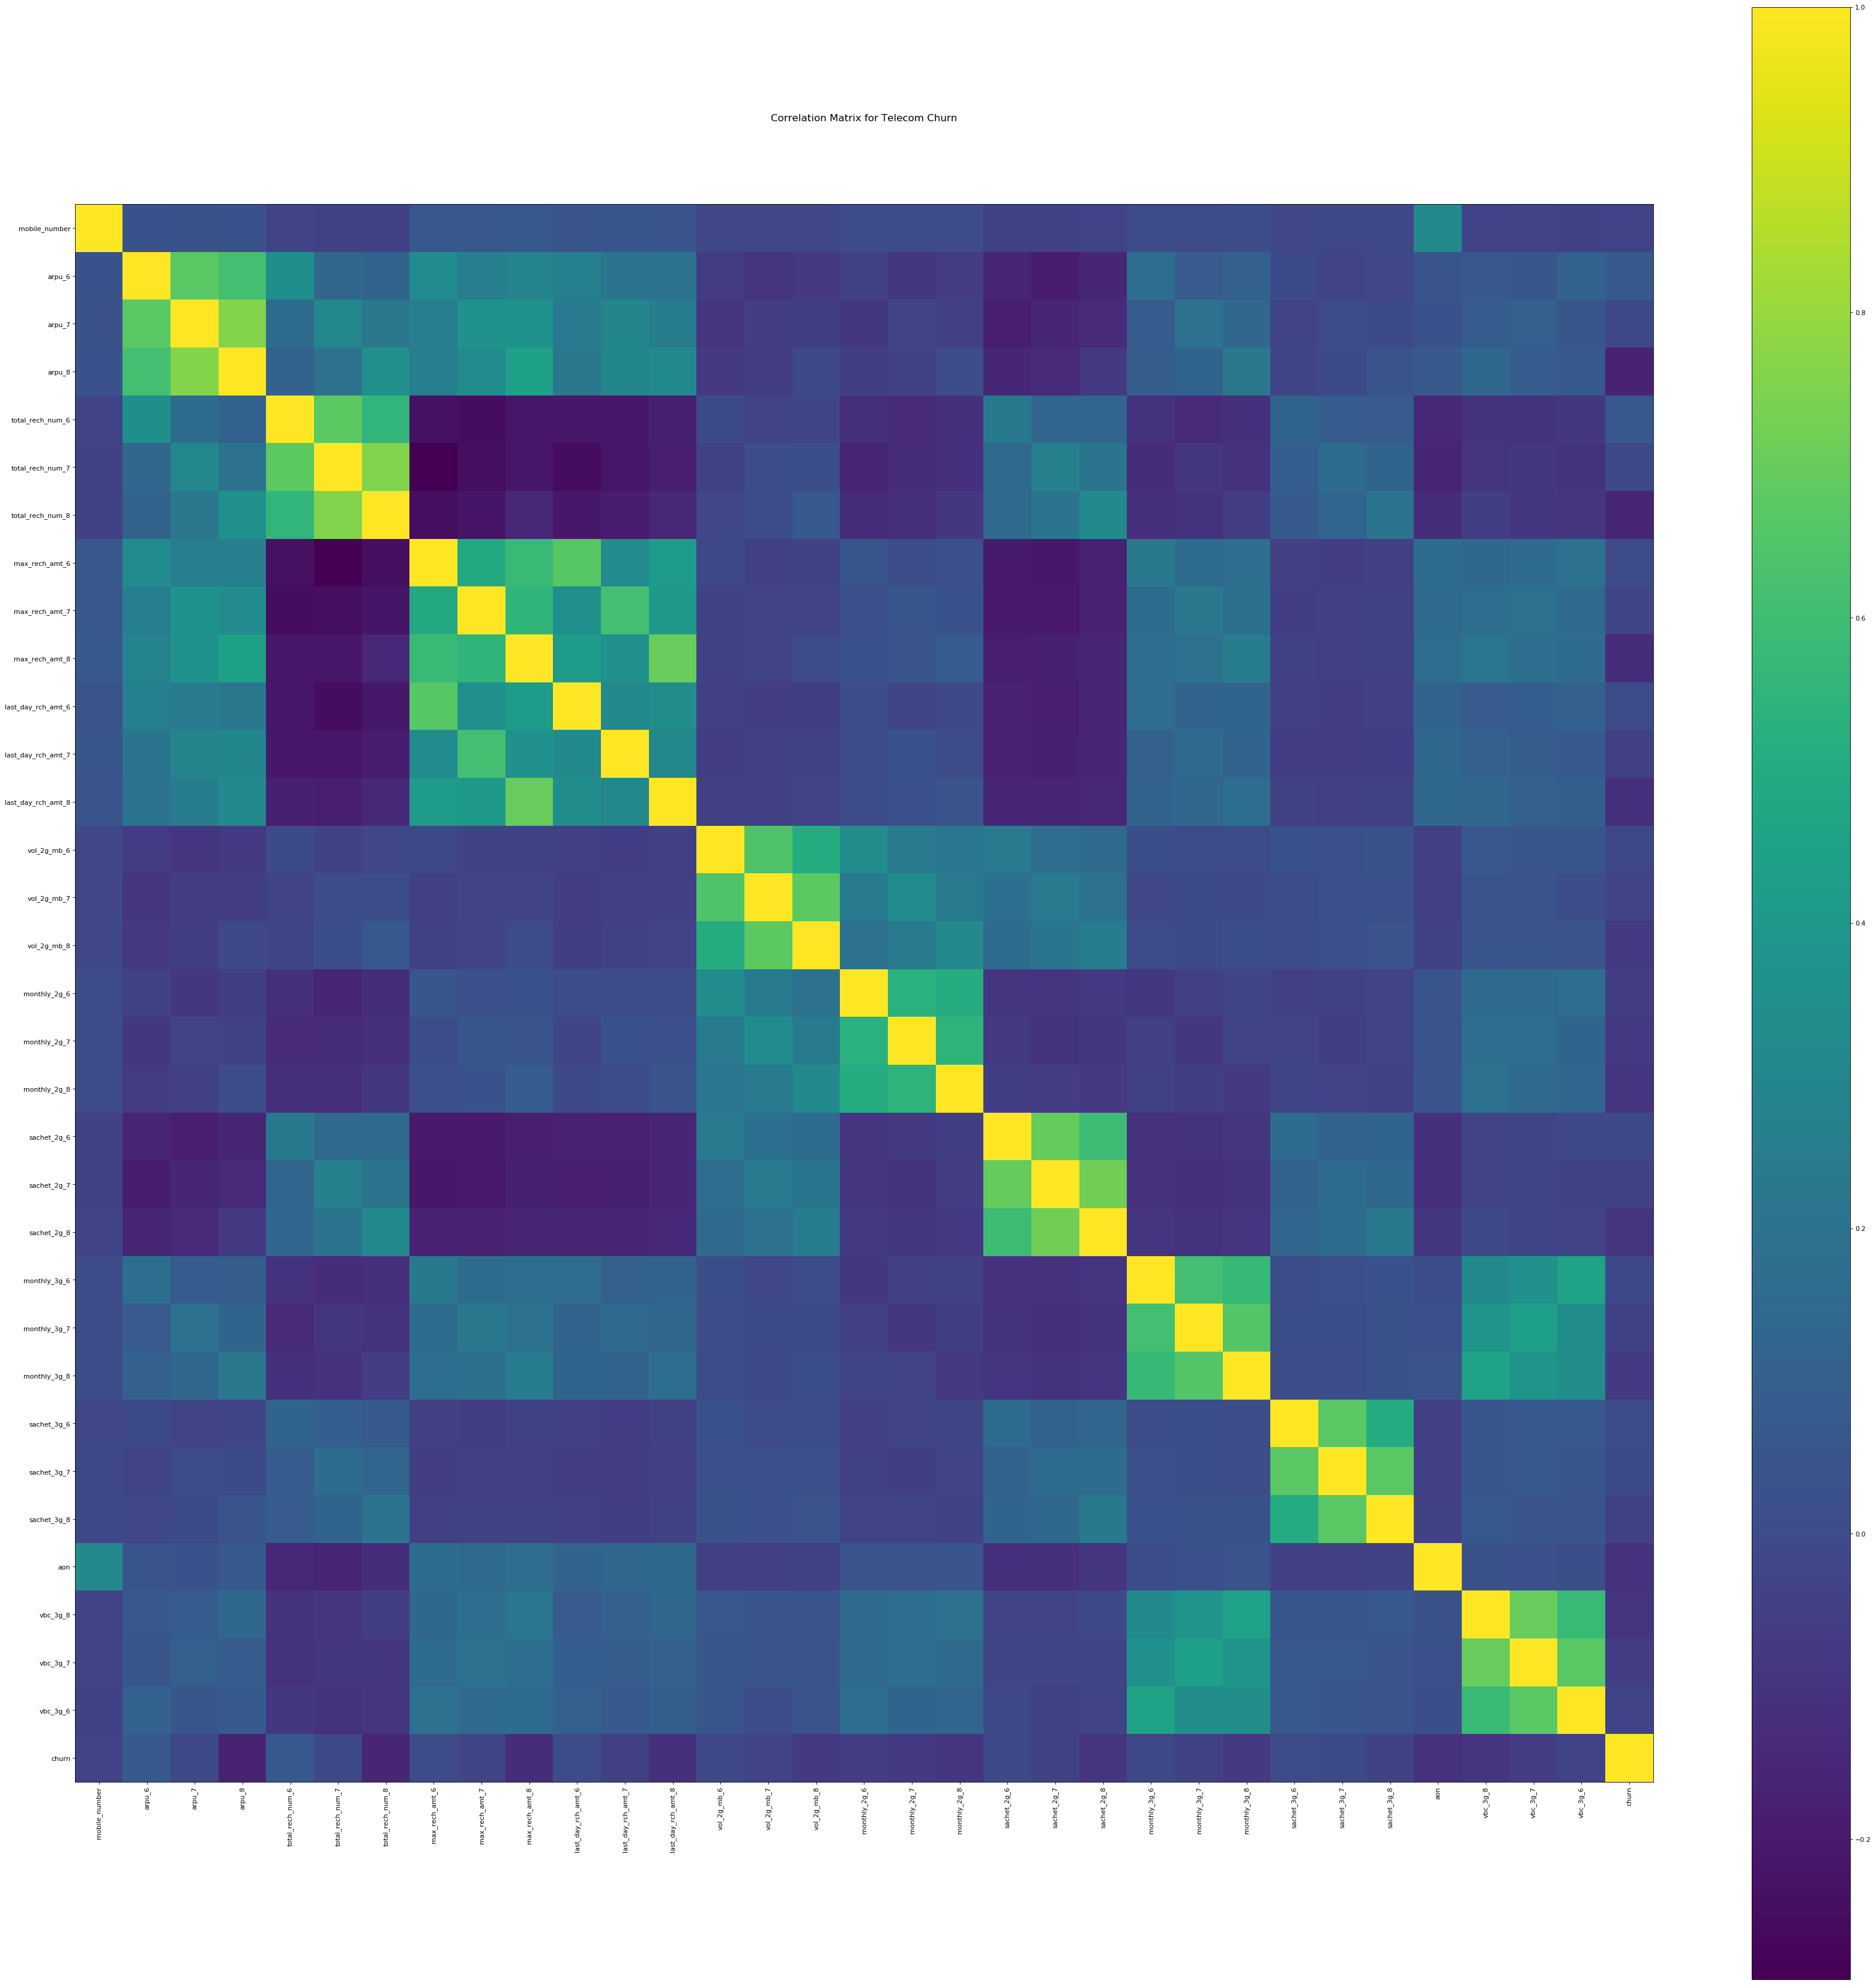

In [29]:
# correlation matrix
plotCorrelationMatrix(high_value_cust, 53)

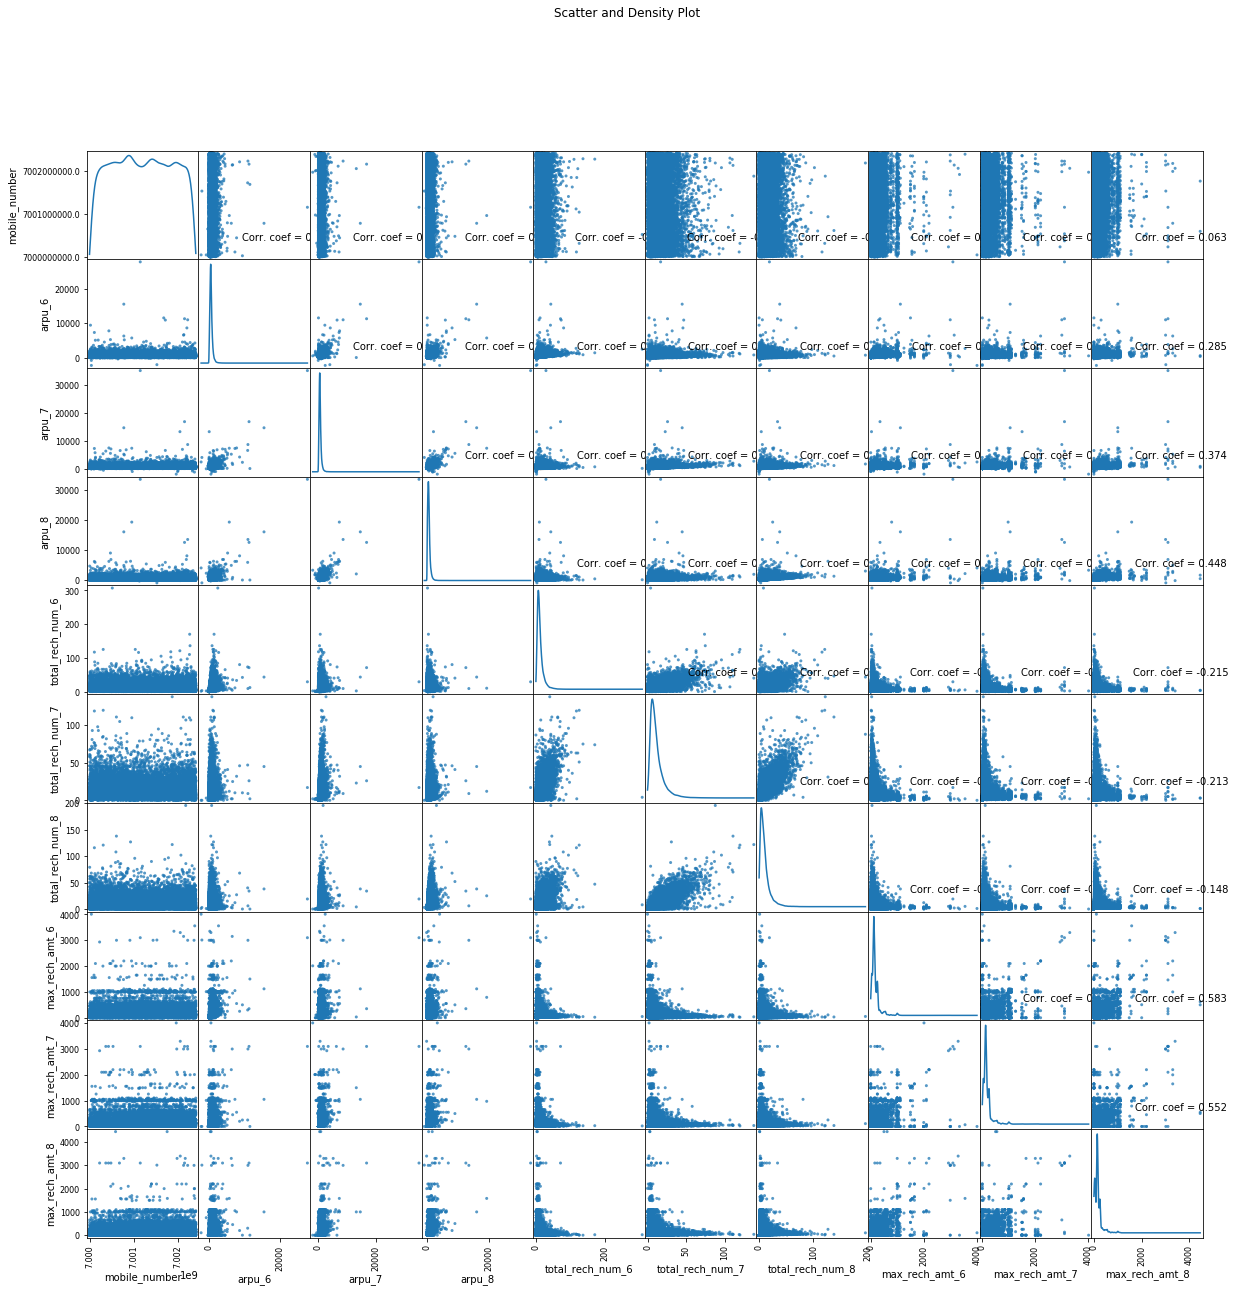

In [30]:
# scatter plot
plotScatterMatrix(high_value_cust, 20, 10)

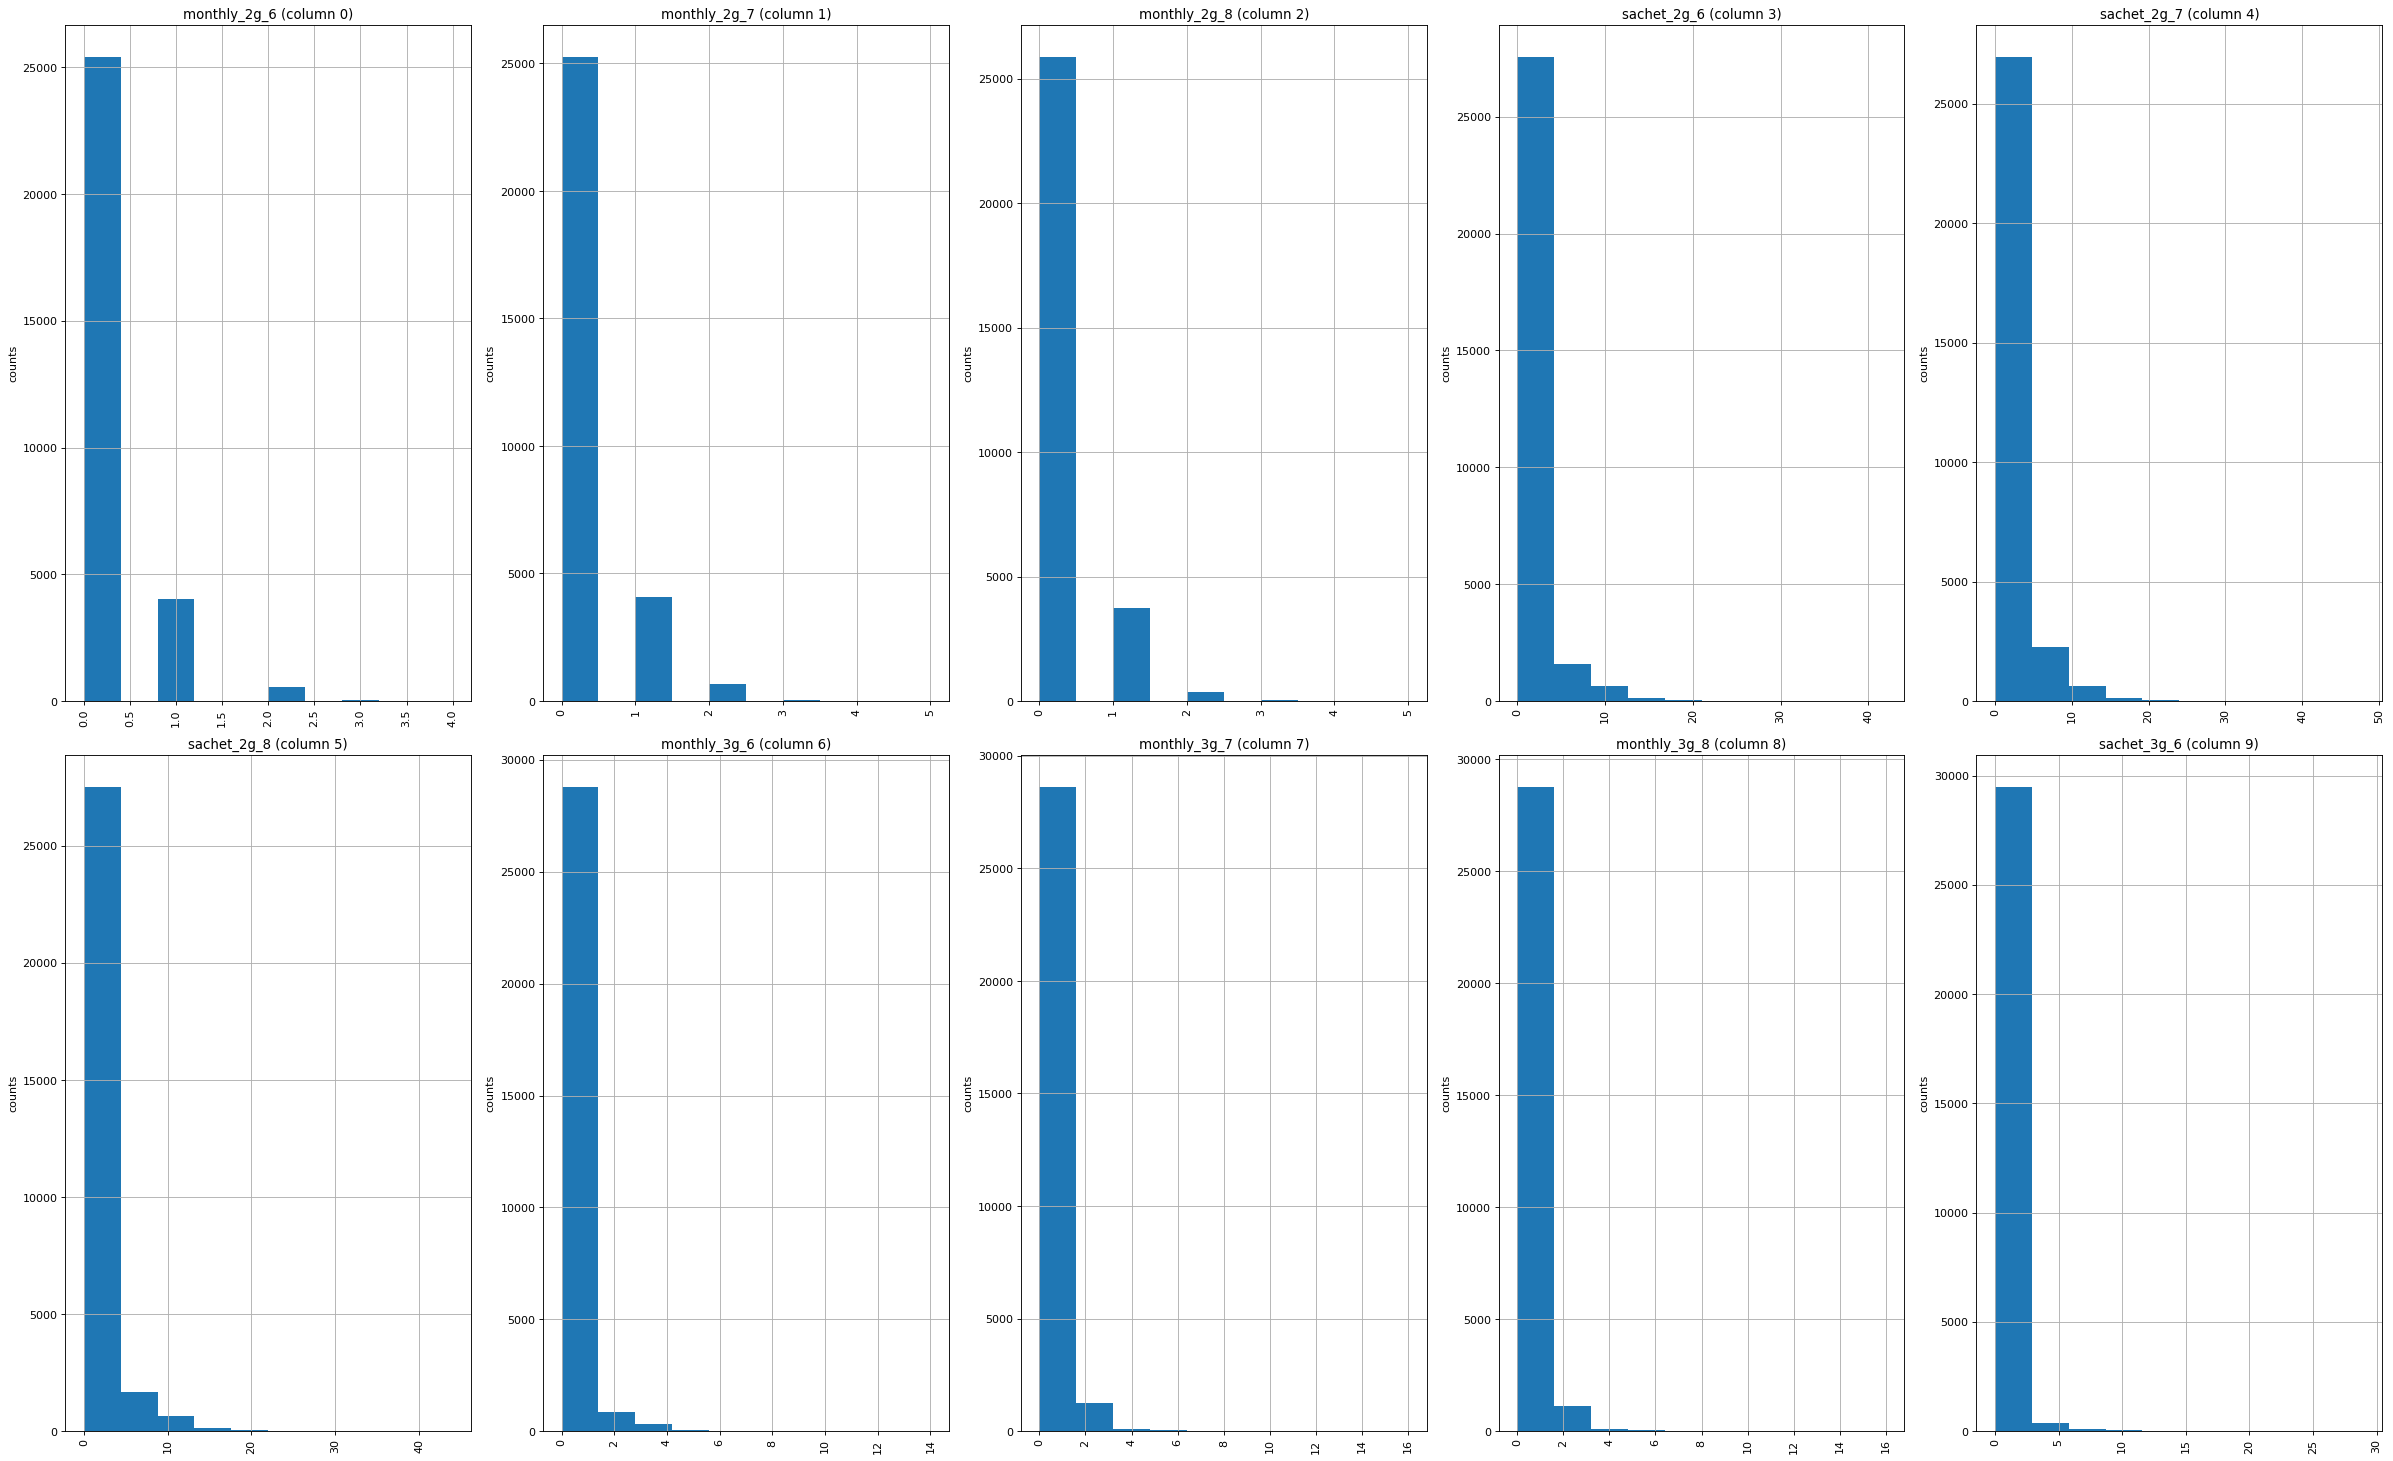

In [31]:
# distribution plot
plotPerColumnDistribution(high_value_cust, 10, 5)

In [32]:
# create columns with 6 and 7th month avgs

In [33]:
column_list = high_value_cust.filter(regex='_6|_7').columns.str[:-2]
column_list.unique()

print (high_value_cust.shape)

for index, col in enumerate(column_list.unique()):
    print(col)
    avg_column = "avg_"+col+"_av67"
    col_6 = col+"_6"
    col_7 = col+"_7"
    high_value_cust[avg_column] = (high_value_cust[col_6]  + high_value_cust[col_7])/ 2

(30001, 87)
arpu
onnet_mou
offnet_mou
roam_ic_mou
roam_og_mou
loc_og_t2c_mou
loc_og_mou
std_og_t2f_mou
std_og_mou
isd_og_mou
spl_og_mou
og_others
loc_ic_mou
std_ic_t2t_mou
std_ic_t2f_mou
std_ic_mou
spl_ic_mou
isd_ic_mou
ic_others
total_rech_num
max_rech_amt
last_day_rch_amt
vol_2g_mb
monthly_2g
sachet_2g
monthly_3g
sachet_3g
vbc_3g


In [34]:
high_value_cust.drop(high_value_cust.filter(regex='_6|_7').columns, axis=1, inplace=True)
high_value_cust.shape

(30001, 59)

In [35]:
high_value_cust

,mobile_number,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2f_mou_8,std_og_mou_8,...,avg_ic_others_av67,avg_total_rech_num_av67,avg_max_rech_amt_av67,avg_last_day_rch_amt_av67,avg_vol_2g_mb_av67,avg_monthly_2g_av67,avg_sachet_2g_av67,avg_monthly_3g_av67,avg_sachet_3g_av67,avg_vbc_3g_av67
0,7000842753,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,NaN,3.5,252.0,252.0,15.725,0.0,0.0,1.0,0.0,50.600
7,7000701601,3171.480,52.29,325.91,31.64,38.06,0.00,255.79,16.68,77.84,...,15.465,5.0,1185.0,0.0,0.000,0.0,0.0,0.0,0.0,19.060
8,7001524846,137.362,35.08,136.48,0.00,0.00,7.15,63.04,0.00,98.28,...,0.000,20.0,122.0,25.0,178.000,0.5,0.5,0.0,0.0,516.405
21,7002124215,637.760,85.14,983.39,0.00,0.00,0.00,129.74,0.00,938.79,...,0.000,24.0,50.0,25.0,0.000,0.0,0.0,0.0,0.0,0.000
23,7000887461,366.966,33.58,205.89,0.00,0.00,17.71,182.14,0.00,39.61,...,2.675,4.0,89.5,89.5,0.240,0.0,0.0,1.0,0.0,25.930
33,7000149764,409.230,0.00,0.00,0.00,0.00,0.56,0.00,0.00,0.00,...,0.940,10.5,753.5,126.0,72.405,0.0,0.0,4.5,2.0,2210.750
38,7000815202,393.909,666.38,97.81,0.00,0.00,0.00,28.44,0.00,735.74,...,0.000,24.5,70.0,20.0,0.000,0.0,0.0,0.0,0.0,0.000
41,7000721289,229.769,80.44,136.69,0.00,0.00,0.00,203.21,13.18,13.18,...,0.280,4.0,150.0,150.0,0.000,0.0,0.0,0.0,0.0,0.000
48,7000294396,179.218,156.91,68.18,0.00,0.00,0.00,95.69,0.00,129.39,...,0.000,9.0,250.0,180.0,0.000,0.0,0.0,0.0,0.0,0.000
53,7002188521,706.020,102.69,261.34,0.00,0.00,0.00,241.61,0.00,5.23,...,0.000,25.0,135.0,65.0,0.135,0.0,4.5,0.0,0.0,0.000


Text(0.5,1,'Churn Distribution')

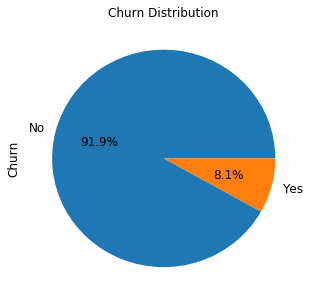

In [36]:
#Churn Distribution
ax = (high_value_cust['churn'].value_counts()*100.0 /len(high_value_cust)).plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )                                                                           

ax.set_ylabel('Churn',fontsize = 12)
ax.set_title('Churn Distribution', fontsize = 12)

In [37]:
#Convert AON in Months
high_value_cust['aon_mon'] = high_value_cust['aon']/30
high_value_cust.drop('aon', axis=1, inplace=True)
high_value_cust['aon_mon'].head()

0     32.266667
7     26.733333
8     10.500000
21    24.000000
23    20.133333
Name: aon_mon, dtype: float64

Text(0.5,1,'Customers by tenure')

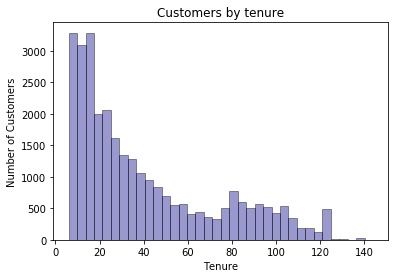

In [38]:
ax = sns.distplot(high_value_cust['aon_mon'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('Number of Customers')
ax.set_xlabel('Tenure')
ax.set_title('Customers by tenure')

In [39]:
tenureRange = [0, 6, 12, 24, 60, 61]
high_value_cust['tenure_range'] = pd.cut(high_value_cust['aon_mon'], tenureRange, labels=[ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above'])
high_value_cust['tenure_range'].head()

0         2-5 Yrs
7         2-5 Yrs
8     6-12 Months
21        1-2 Yrs
23        1-2 Yrs
Name: tenure_range, dtype: category
Categories (5, object): [0-6 Months < 6-12 Months < 1-2 Yrs < 2-5 Yrs < 5 Yrs and above]

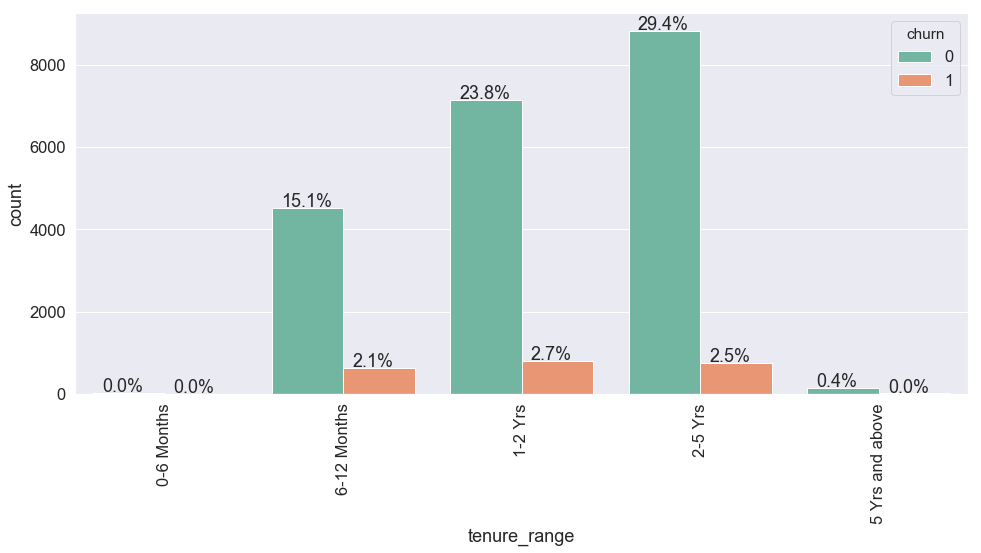

In [40]:
sns.set()
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
temp = pd.Series(data = 'tenure_range')
fig, ax = plt.subplots()
width = len(high_value_cust['tenure_range'].unique()) + 6 + 4*len(temp.unique())
fig.set_size_inches(width , 7)

total = float(len(high_value_cust.index))
ax = sns.countplot(x="tenure_range", data=high_value_cust, palette="Set2", hue = "churn");
for p in ax.patches:
    ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(high_value_cust))), (p.get_x()+0.05, p.get_height()+20))
plt.xticks(rotation=90)
plt.show()

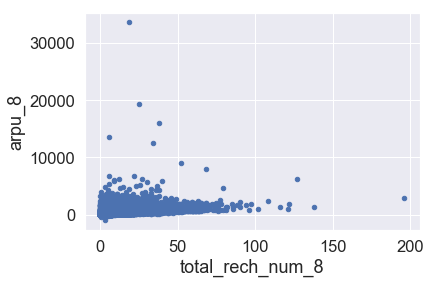

In [41]:
high_value_cust[['total_rech_num_8', 'arpu_8']].plot.scatter(x = 'total_rech_num_8',y='arpu_8')

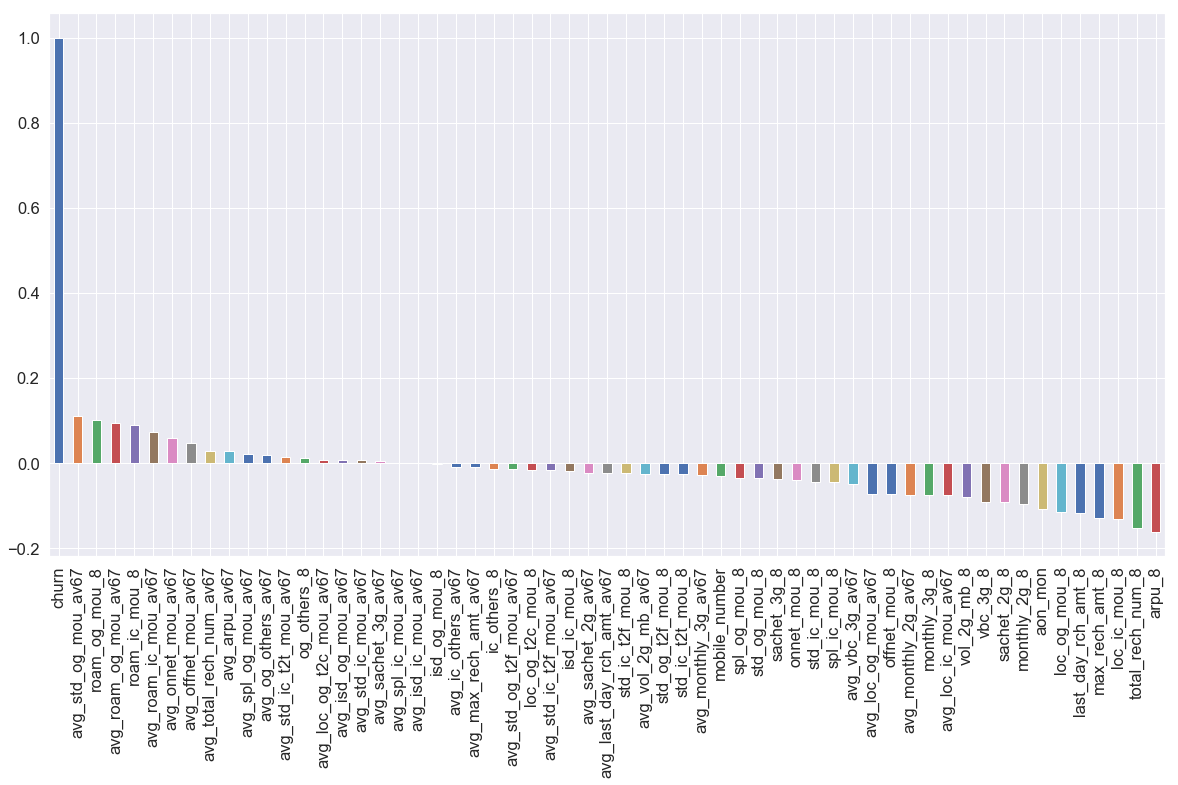

In [42]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(20,10))
high_value_cust.corr()['churn'].sort_values(ascending = False).plot(kind='bar')

In [43]:
# Churn vs tenure

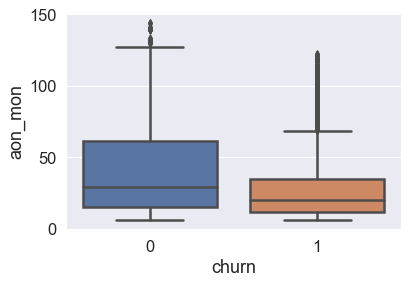

In [44]:
sns.boxplot(x = high_value_cust.churn, y = high_value_cust.aon_mon)

S:\AnacodaPy\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Distribution of Volume based cost by churn')

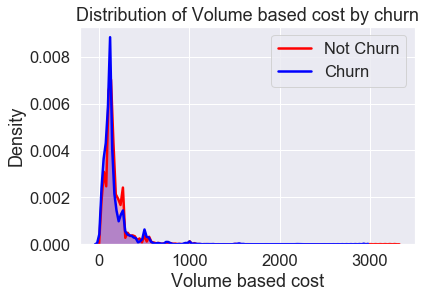

In [45]:
ax = sns.kdeplot(high_value_cust.avg_max_rech_amt_av67[(high_value_cust["churn"] == 0)],color="Red", shade = True)
ax = sns.kdeplot(high_value_cust.avg_max_rech_amt_av67[(high_value_cust["churn"] == 1)],ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Volume based cost')
ax.set_title('Distribution of Volume based cost by churn')


In [46]:
high_value_cust.head(10)

,mobile_number,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2f_mou_8,std_og_mou_8,...,avg_max_rech_amt_av67,avg_last_day_rch_amt_av67,avg_vol_2g_mb_av67,avg_monthly_2g_av67,avg_sachet_2g_av67,avg_monthly_3g_av67,avg_sachet_3g_av67,avg_vbc_3g_av67,aon_mon,tenure_range
0,7000842753,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,252.0,252.0,15.725,0.0,0.0,1.0,0.0,50.600,32.266667,2-5 Yrs
7,7000701601,3171.480,52.29,325.91,31.64,38.06,0.00,255.79,16.68,77.84,...,1185.0,0.0,0.000,0.0,0.0,0.0,0.0,19.060,26.733333,2-5 Yrs
8,7001524846,137.362,35.08,136.48,0.00,0.00,7.15,63.04,0.00,98.28,...,122.0,25.0,178.000,0.5,0.5,0.0,0.0,516.405,10.500000,6-12 Months
21,7002124215,637.760,85.14,983.39,0.00,0.00,0.00,129.74,0.00,938.79,...,50.0,25.0,0.000,0.0,0.0,0.0,0.0,0.000,24.000000,1-2 Yrs
23,7000887461,366.966,33.58,205.89,0.00,0.00,17.71,182.14,0.00,39.61,...,89.5,89.5,0.240,0.0,0.0,1.0,0.0,25.930,20.133333,1-2 Yrs
33,7000149764,409.230,0.00,0.00,0.00,0.00,0.56,0.00,0.00,0.00,...,753.5,126.0,72.405,0.0,0.0,4.5,2.0,2210.750,44.266667,2-5 Yrs
38,7000815202,393.909,666.38,97.81,0.00,0.00,0.00,28.44,0.00,735.74,...,70.0,20.0,0.000,0.0,0.0,0.0,0.0,0.000,38.500000,2-5 Yrs
41,7000721289,229.769,80.44,136.69,0.00,0.00,0.00,203.21,13.18,13.18,...,150.0,150.0,0.000,0.0,0.0,0.0,0.0,0.000,67.000000,NaN
48,7000294396,179.218,156.91,68.18,0.00,0.00,0.00,95.69,0.00,129.39,...,250.0,180.0,0.000,0.0,0.0,0.0,0.0,0.000,42.166667,2-5 Yrs
53,7002188521,706.020,102.69,261.34,0.00,0.00,0.00,241.61,0.00,5.23,...,135.0,65.0,0.135,0.0,4.5,0.0,0.0,0.000,23.233333,1-2 Yrs


In [47]:
#Lets Create New DF for Model Building
model_df = high_value_cust[:].copy()

#Dropping tenure_range
model_df.drop('tenure_range', axis=1, inplace=True)
model_df.drop('mobile_number', axis=1, inplace=True)
model_df.fillna(0, inplace=True)
model_df.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,...,avg_total_rech_num_av67,avg_max_rech_amt_av67,avg_last_day_rch_amt_av67,avg_vol_2g_mb_av67,avg_monthly_2g_av67,avg_sachet_2g_av67,avg_monthly_3g_av67,avg_sachet_3g_av67,avg_vbc_3g_av67,aon_mon
0,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,3.5,252.0,252.0,15.725,0.0,0.0,1.0,0.0,50.600,32.266667
7,3171.480,52.29,325.91,31.64,38.06,0.00,255.79,16.68,77.84,10.01,...,5.0,1185.0,0.0,0.000,0.0,0.0,0.0,0.0,19.060,26.733333
8,137.362,35.08,136.48,0.00,0.00,7.15,63.04,0.00,98.28,0.00,...,20.0,122.0,25.0,178.000,0.5,0.5,0.0,0.0,516.405,10.500000
21,637.760,85.14,983.39,0.00,0.00,0.00,129.74,0.00,938.79,0.00,...,24.0,50.0,25.0,0.000,0.0,0.0,0.0,0.0,0.000,24.000000
23,366.966,33.58,205.89,0.00,0.00,17.71,182.14,0.00,39.61,0.00,...,4.0,89.5,89.5,0.240,0.0,0.0,1.0,0.0,25.930,20.133333


In [48]:
# drop churn
X = model_df.drop(['churn'], axis=1)
y = model_df['churn']
model_df.drop('churn', axis=1, inplace=True)

In [49]:
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)
# Split in train & Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)
print("X_train Shape : ", X_train.shape)
print("X_test Shape : ", X_test.shape)

X_train Shape :  (21000, 57)
X_test Shape :  (9001, 57)


In [50]:
y_train_imb = (y_train != 0).sum()/(y_train == 0).sum()
y_test_imb = (y_test != 0).sum()/(y_test == 0).sum()
print("Imbalance in Train:", y_train_imb)
print("Imbalance in Test:", y_test_imb)

Imbalance in Train: 0.08875985068436333
Imbalance in Test: 0.08812862669245648


# Model Building

# SVM

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

lr = LogisticRegression()
lr.svm = SVC(kernel='linear') 
lr.svm.fit(X_train,y_train)
preds = lr.svm.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.9170138310281619

# RFE

In [52]:
# Feature reduction
lr = LogisticRegression()
rfe = RFE(lr, 15)   
rfe = rfe.fit(X, y)
rfe_features = list(model_df.columns[rfe.support_])
print("Features identified by RFE ", rfe_features)

Features identified by RFE  ['arpu_8', 'loc_og_mou_8', 'loc_ic_mou_8', 'std_ic_t2t_mou_8', 'std_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8', 'last_day_rch_amt_8', 'vol_2g_mb_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'vbc_3g_8', 'avg_arpu_av67', 'avg_loc_ic_mou_av67']


In [53]:
rfe_features = list(model_df.columns[rfe.support_])
rfe_features

['arpu_8',
 'loc_og_mou_8',
 'loc_ic_mou_8',
 'std_ic_t2t_mou_8',
 'std_ic_mou_8',
 'spl_ic_mou_8',
 'total_rech_num_8',
 'last_day_rch_amt_8',
 'vol_2g_mb_8',
 'monthly_2g_8',
 'sachet_2g_8',
 'monthly_3g_8',
 'vbc_3g_8',
 'avg_arpu_av67',
 'avg_loc_ic_mou_av67']

In [54]:
# Features identified  ['loc_og_mou_8', 'og_others_8', 'loc_ic_mou_8', 'std_ic_t2f_mou_8', 'std_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8', 'last_day_rch_amt_8', 'vol_2g_mb_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'avg_arpu_av67', 'avg_loc_ic_mou_av67', 'avg_total_rech_num_av67']
X_rfe = pd.DataFrame(data=X).iloc[:, rfe.support_]
y_rfe = y

# Logistic Regression


In [55]:
lr = LogisticRegression(random_state=1)
lr.fit(X_rfe, y_rfe)
X_test_rfe = pd.DataFrame(data=X_test).iloc[:, rfe.support_]
y_pred = lr.predict(X_test_rfe)
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[5466   37]
 [ 384  114]]


In [56]:
'Accuracy on test data set ',lr.score(X_test_rfe, y_test)

('Accuracy on test data set ', 0.9298450258290285)

In [57]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.93      0.99      0.96      5503
          1       0.75      0.23      0.35       498

avg / total       0.92      0.93      0.91      6001



In [58]:
# getweights of variables
pd.Series(lr.coef_[0],index=rfe_features).sort_values(ascending = False)

avg_arpu_av67          0.634380
avg_loc_ic_mou_av67    0.483735
std_ic_t2t_mou_8      -0.097164
vol_2g_mb_8           -0.260794
std_ic_mou_8          -0.261186
vbc_3g_8              -0.323957
monthly_3g_8          -0.377849
spl_ic_mou_8          -0.446393
total_rech_num_8      -0.466208
loc_og_mou_8          -0.480660
last_day_rch_amt_8    -0.489953
monthly_2g_8          -0.506203
sachet_2g_8           -0.583946
arpu_8                -0.632106
loc_ic_mou_8          -2.563288
dtype: float64

In [59]:
# It is clearly visible that model has drawback in predicting churn as high false positives.

# PCA

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)

In [61]:
from sklearn.decomposition import PCA
#Doing the PCA on the train data
pca = PCA(random_state=100)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=100,
  svd_solver='auto', tol=0.0, whiten=False)

In [62]:
X_pca = pca.fit_transform(X)
print(X_pca.shape)

X_test_pca = pca.transform(X_test)
print(X_test_pca.shape)

(30001, 57)
(9001, 57)


In [63]:
lr_pca = LogisticRegression(C=1e9)
lr_pca.fit(X_pca, y)

# Predicted probabilities
y_pred = lr_pca.predict(X_test_pca)

# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)


In [64]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# Printing confusion matrix
print(confusion_matrix(y_test,y_pred))

[[8177   95]
 [ 547  182]]


In [65]:
print("LR accuracy with PCA: ",accuracy_score(y_test,y_pred))

LR accuracy with PCA:  0.928674591712032


In [66]:
column = list(model_df.columns)
df_pca = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'PC3':pca.components_[2],'Feature':column})
df_pca.head(10)

,PC1,PC2,PC3,Feature
0,0.328011,0.018111,-0.096961,arpu_8
1,0.203577,-0.183521,-0.009703,onnet_mou_8
2,0.265698,-0.115486,-0.076788,offnet_mou_8
3,0.070559,0.022602,0.088575,roam_ic_mou_8
4,0.096848,-0.000189,0.064419,roam_og_mou_8
5,0.039350,-0.083732,-0.023749,loc_og_t2c_mou_8
6,0.209058,0.047901,-0.190735,loc_og_mou_8
7,0.068087,0.078364,0.142866,std_og_t2f_mou_8
8,0.212173,-0.258506,0.042912,std_og_mou_8
9,0.123564,0.045036,-0.104341,isd_og_mou_8


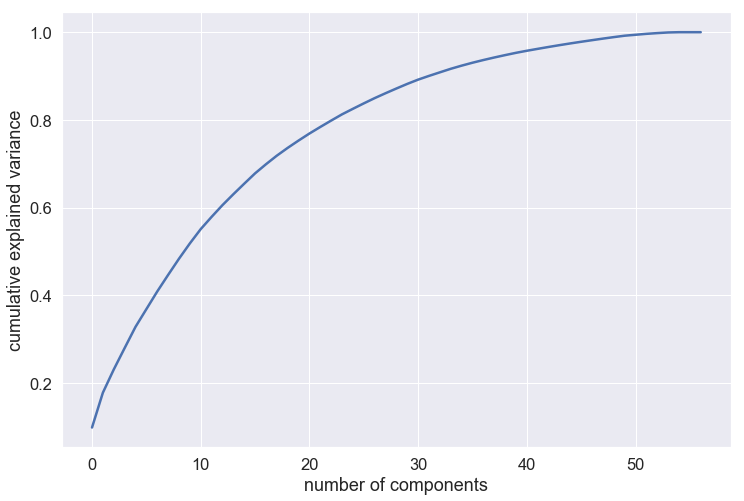

In [67]:
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [68]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([  9.86,  17.81,  23.09,  27.98,  32.82,  36.86,  40.89,  44.67,
        48.36,  51.85,  55.11,  57.9 ,  60.58,  63.06,  65.46,  67.82,
        69.89,  71.85,  73.63,  75.3 ,  76.9 ,  78.4 ,  79.86,  81.28,
        82.54,  83.78,  84.98,  86.1 ,  87.18,  88.23,  89.2 ,  90.05,
        90.86,  91.66,  92.38,  93.05,  93.66,  94.24,  94.78,  95.3 ,
        95.77,  96.21,  96.64,  97.05,  97.45,  97.83,  98.19,  98.55,
        98.89,  99.21,  99.42,  99.63,  99.8 ,  99.95, 100.01, 100.01,
       100.01])

In [69]:
pcaWith32 = PCA(n_components=32)

pcaWith32_df = pcaWith32.fit_transform(X)
print(pcaWith32_df.shape)

pcaWith32_df_test = pcaWith32.transform(X_test)
print(pcaWith32_df_test.shape)

(30001, 32)
(9001, 32)


In [70]:
# run the model with selected variables
lr_pca1 = LogisticRegression(C=1e9)
lr_pca1.fit(pcaWith32_df, y)

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [71]:
# Predicted probabilities
y_predWith32 = lr_pca1.predict(pcaWith32_df_test)

# Converting y_pred to a dataframe which is an array
df_y_pred = pd.DataFrame(y_predWith32)
print(confusion_matrix(y_test,y_predWith32))

[[8162  110]
 [ 574  155]]


In [72]:
print("Logistic Regression accuracy with PCA: ",accuracy_score(y_test,y_predWith32))

Logistic Regression accuracy with PCA:  0.9240084435062771


In [73]:
# Main Features are arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8

# Decision Tree

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)

# Lasso

In [75]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
 
lsvc = LinearSVC(C=0.001, penalty="l1", dual=False).fit(X, y)
model = SelectFromModel(lsvc, prefit=True)
X_lasso = model.transform(X)
pos = model.get_support(indices=True)
# Feature reduction using RFE
print(X_lasso.shape)
print(pos)

(30001, 23)
[ 0  2  4  6  8 12 15 16 19 20 21 22 23 24 25 27 28 31 32 36 47 51 56]


In [76]:
#feature vector for decision tree
features_lasso = list(model_df.columns[pos])
print("Features: ", features_lasso)

Features:  ['arpu_8', 'offnet_mou_8', 'roam_og_mou_8', 'loc_og_mou_8', 'std_og_mou_8', 'loc_ic_mou_8', 'std_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8', 'max_rech_amt_8', 'last_day_rch_amt_8', 'vol_2g_mb_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'vbc_3g_8', 'avg_arpu_av67', 'avg_roam_ic_mou_av67', 'avg_roam_og_mou_av67', 'avg_std_og_mou_av67', 'avg_total_rech_num_av67', 'avg_monthly_2g_av67', 'aon_mon']


In [77]:
# Importing decision tree lib
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

dTree = DecisionTreeClassifier(max_depth=5)
dTree.fit(X_lasso, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [78]:
pos

array([ 0,  2,  4,  6,  8, 12, 15, 16, 19, 20, 21, 22, 23, 24, 25, 27, 28,
       31, 32, 36, 47, 51, 56], dtype=int64)

In [79]:

X_test.shape

(9001, 57)

In [80]:
# The evaluation metrics of our default model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
X_test_ref = pd.DataFrame(data=X_test).iloc[:, pos]
y_pred1 = dTree.predict(X_test_ref)
print(classification_report(y_test, y_pred1))


             precision    recall  f1-score   support

          0       0.96      0.98      0.97      8272
          1       0.73      0.48      0.58       729

avg / total       0.94      0.94      0.94      9001



In [81]:
# Printing classification report
print(classification_report(y_test, y_pred1))

             precision    recall  f1-score   support

          0       0.96      0.98      0.97      8272
          1       0.73      0.48      0.58       729

avg / total       0.94      0.94      0.94      9001



In [82]:
print('Accuracy of DT :',accuracy_score(y_test,y_pred1))

Accuracy of DT : 0.9436729252305299


# HyperParameter Tuning

In [83]:
# GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
n_folds = 5

# parameters to build the model
parameters = {'max_depth': range(1, 40)}
decisionTree = DecisionTreeClassifier(criterion = "gini",random_state = 100)

# fit tree on training data
tree = GridSearchCV(decisionTree, parameters,cv=n_folds,scoring="accuracy")
tree.fit(X_lasso, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(1, 40)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

In [84]:
#  scores of GridSearch CV
score = tree.cv_results_
pd.DataFrame(score).head()

S:\AnacodaPy\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
S:\AnacodaPy\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
S:\AnacodaPy\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
S:\AnacodaPy\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are acc

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.036502,2.863216e-03,0.000798,0.000399,1,{'max_depth': 1},0.932511,0.933333,0.921333,0.933833,...,0.928936,0.005323,11,0.928125,0.927920,0.930878,0.927795,0.930336,0.929011,0.001319
1,0.058842,1.784161e-07,0.000000,0.000000,2,{'max_depth': 2},0.943676,0.940500,0.936833,0.942167,...,0.939569,0.003347,6,0.940000,0.939878,0.941669,0.940419,0.941211,0.940635,0.000696
2,0.082379,4.884998e-04,0.000798,0.000399,3,{'max_depth': 3},0.944176,0.941833,0.938333,0.943333,...,0.941335,0.002314,2,0.940917,0.941044,0.942377,0.941127,0.941794,0.941452,0.000553
3,0.107113,1.196702e-03,0.000798,0.000399,4,{'max_depth': 4},0.942010,0.942667,0.939333,0.947833,...,0.941735,0.003686,1,0.942917,0.942961,0.944169,0.942002,0.944877,0.943385,0.001015
4,0.129254,7.976771e-04,0.000798,0.000399,5,{'max_depth': 5},0.942676,0.941667,0.935667,0.947000,...,0.940969,0.003943,3,0.945042,0.944336,0.945836,0.944002,0.945127,0.944869,0.000643


S:\AnacodaPy\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


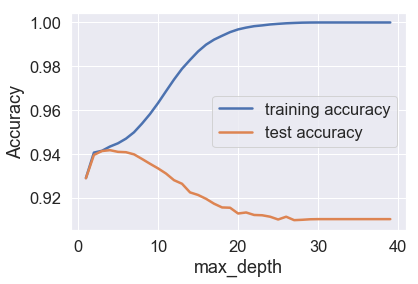

In [85]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(score["param_max_depth"], score["mean_train_score"], label="training accuracy")
plt.plot(score["param_max_depth"], score["mean_test_score"], label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [86]:
parameters = {'min_samples_leaf': range(5, 200, 20)}

dtree = DecisionTreeClassifier(criterion = "gini", random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, cv=n_folds, scoring="accuracy")
tree.fit(X_lasso, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_leaf': range(5, 200, 20)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [87]:
# scores
score = tree.cv_results_
pd.DataFrame(score).head()

S:\AnacodaPy\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
S:\AnacodaPy\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
S:\AnacodaPy\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
S:\AnacodaPy\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are acc

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.368215,0.021515,0.001596,4.887139e-04,5,{'min_samples_leaf': 5},0.927845,0.929333,0.926833,0.928833,...,0.926702,0.003137,10,0.968625,0.967918,0.968876,0.967418,0.967793,0.968126,0.000542
1,0.301393,0.015532,0.001397,4.886750e-04,25,{'min_samples_leaf': 25},0.939177,0.938667,0.937667,0.943333,...,0.938569,0.002992,9,0.948583,0.948877,0.949835,0.949127,0.950794,0.949443,0.000792
2,0.271873,0.008287,0.000998,4.672031e-07,45,{'min_samples_leaf': 45},0.940010,0.942500,0.936500,0.937000,...,0.938602,0.002312,8,0.946333,0.946169,0.946794,0.945252,0.947086,0.946327,0.000628
3,0.257511,0.011483,0.000998,2.431402e-07,65,{'min_samples_leaf': 65},0.943343,0.943167,0.937000,0.937833,...,0.939735,0.002886,5,0.943750,0.944419,0.945127,0.943544,0.946211,0.944610,0.000974
4,0.249732,0.014183,0.000998,2.431402e-07,85,{'min_samples_leaf': 85},0.943009,0.943833,0.937167,0.942500,...,0.940435,0.003342,4,0.943208,0.943877,0.944669,0.943044,0.945294,0.944019,0.000857


S:\AnacodaPy\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


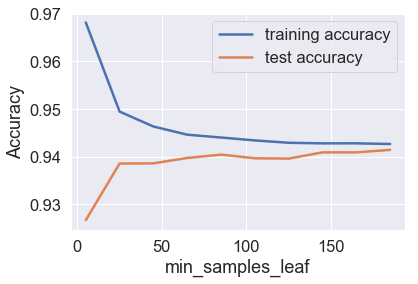

In [88]:
# plotting accuracies
plt.figure()
plt.plot(score["param_min_samples_leaf"],score["mean_train_score"], label="training accuracy")
plt.plot(score["param_min_samples_leaf"], score["mean_test_score"], label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [89]:
parameters = {'min_samples_split': range(5, 200, 20)}
dtree = DecisionTreeClassifier(criterion = "gini",random_state = 100)
tree = GridSearchCV(dtree, parameters, cv=n_folds, scoring="accuracy")
tree.fit(X_lasso, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_split': range(5, 200, 20)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [90]:
# scores
scores = tree.cv_results_
pd.DataFrame(scores).head()

S:\AnacodaPy\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
S:\AnacodaPy\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
S:\AnacodaPy\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
S:\AnacodaPy\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are acc

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.395342,0.017668,0.001397,4.888502e-04,5,{'min_samples_split': 5},0.915181,0.918000,0.911667,0.912000,...,0.913036,0.003296,10,0.991667,0.991209,0.991625,0.991542,0.992125,0.991634,0.000294
1,0.389957,0.020125,0.001397,4.886166e-04,25,{'min_samples_split': 25},0.929845,0.926500,0.922167,0.926667,...,0.925602,0.002808,9,0.965083,0.966335,0.966793,0.967460,0.965918,0.966318,0.000802
2,0.385569,0.018320,0.000998,4.422006e-07,45,{'min_samples_split': 45},0.929012,0.933000,0.930833,0.931833,...,0.930169,0.002391,8,0.958000,0.957668,0.961002,0.960418,0.959668,0.959351,0.001313
3,0.381978,0.021034,0.001397,4.886945e-04,65,{'min_samples_split': 65},0.932845,0.936167,0.932000,0.933000,...,0.932269,0.002846,7,0.955000,0.954335,0.956168,0.955877,0.956377,0.955551,0.000768
4,0.380183,0.020501,0.000998,1.168008e-07,85,{'min_samples_split': 85},0.934844,0.938667,0.931833,0.935833,...,0.933969,0.003435,6,0.952542,0.952127,0.954085,0.954085,0.954877,0.953543,0.001037


S:\AnacodaPy\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


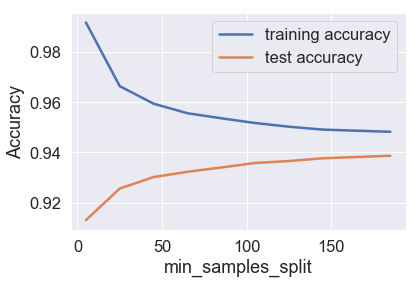

In [91]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_split"],scores["mean_train_score"], label="training accuracy")
plt.plot(scores["param_min_samples_split"], scores["mean_test_score"], label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [92]:
# min sample is 50
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(25, 175, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, cv = n_folds, verbose = 1)
grid_search.fit(X_lasso, y)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:   24.9s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(5, 15, 5), 'min_samples_leaf': range(25, 175, 50), 'min_samples_split': range(50, 150, 50), 'criterion': ['entropy', 'gini']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [93]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results


S:\AnacodaPy\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
S:\AnacodaPy\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
S:\AnacodaPy\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
S:\AnacodaPy\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are acc

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.184307,0.005897,0.000998,5.761645e-07,entropy,5,25,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.944176,...,0.942402,0.003324,1,0.943875,0.943794,0.944627,0.942669,0.944169,0.943827,0.000648
1,0.176927,0.000798,0.000998,3.015783e-07,entropy,5,25,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.944176,...,0.942402,0.003324,1,0.943875,0.943794,0.944627,0.942669,0.944169,0.943827,0.000648
2,0.175331,0.000399,0.000998,3.234067e-07,entropy,5,75,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.943343,...,0.941202,0.002675,5,0.943542,0.943044,0.944086,0.942294,0.943419,0.943277,0.000594
3,0.174932,0.000488,0.000798,3.992320e-04,entropy,5,75,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.943343,...,0.941202,0.002675,5,0.943542,0.943044,0.944086,0.942294,0.943419,0.943277,0.000594
4,0.173137,0.000798,0.000798,3.990651e-04,entropy,5,125,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.940343,...,0.940102,0.002398,15,0.942083,0.942877,0.943961,0.941669,0.943502,0.942819,0.000853
5,0.173735,0.000747,0.000998,2.431402e-07,entropy,5,125,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.940343,...,0.940102,0.002398,15,0.942083,0.942877,0.943961,0.941669,0.943502,0.942819,0.000853
6,0.311566,0.000489,0.000998,3.873843e-07,entropy,10,25,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.941510,...,0.940235,0.002838,14,0.949417,0.948877,0.949627,0.948085,0.949710,0.949143,0.000603
7,0.308574,0.001353,0.001197,3.992081e-04,entropy,10,25,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.941343,...,0.940969,0.002666,7,0.948875,0.946586,0.947044,0.945627,0.947461,0.947118,0.001069
8,0.297212,0.007142,0.000998,2.611745e-07,entropy,10,75,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.942343,...,0.940835,0.001968,8,0.943708,0.944294,0.944211,0.943002,0.946086,0.944260,0.001022
9,0.289449,0.002983,0.000974,1.704544e-05,entropy,10,75,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.942343,...,0.940835,0.001968,8,0.943708,0.944294,0.944211,0.943002,0.946086,0.944260,0.001022


In [94]:
"Accuracy", grid_search.best_score_

('Accuracy', 0.9424019199360021)

In [95]:
grid_search.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=25, min_samples_split=50,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [96]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=5, min_samples_leaf=25,min_samples_split=50)
clf_gini.fit(X_lasso, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=25, min_samples_split=50,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [97]:
# # accuracy score
print ('Accuracy Score for Decision Tree Final Model :',clf_gini.score(X_test_ref,y_test))

Accuracy Score for Decision Tree Final Model : 0.9418953449616709


In [98]:
# Getting around 94% accuracy
# 31 Features were selected

# random forest 

In [99]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

model_rf = RandomForestClassifier()
model_rf.fit(X_lasso, y)

S:\AnacodaPy\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [100]:
# Make predictions
prediction_test = model_rf.predict(X_test_ref)
print ('Randon Forest Accuracy with Default Hyperparameter',metrics.accuracy_score(y_test, prediction_test))

Randon Forest Accuracy with Default Hyperparameter 0.9924452838573492


In [101]:
print(classification_report(y_test,prediction_test))

             precision    recall  f1-score   support

          0       0.99      1.00      1.00      8272
          1       1.00      0.91      0.95       729

avg / total       0.99      0.99      0.99      9001



In [102]:
# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters,cv=n_folds,scoring="accuracy")
rf.fit(X_lasso, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(2, 20, 5)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

In [103]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()


S:\AnacodaPy\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
S:\AnacodaPy\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
S:\AnacodaPy\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
S:\AnacodaPy\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are acc

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.087964,0.008354,0.003591,4.888308e-04,2,{'max_depth': 2},0.941510,0.941167,0.918667,0.937500,...,0.935302,0.008486,4,0.939750,0.939628,0.918670,0.936836,0.940669,0.935111,0.008320
1,0.219014,0.006327,0.004987,2.336015e-07,7,{'max_depth': 7},0.945176,0.945167,0.939333,0.947333,...,0.943102,0.003517,1,0.946542,0.946294,0.947127,0.945836,0.947502,0.946660,0.000592
2,0.328322,0.005023,0.006782,3.991128e-04,12,{'max_depth': 12},0.941176,0.942333,0.939667,0.947000,...,0.941702,0.002974,3,0.967208,0.970668,0.967626,0.964251,0.967043,0.967359,0.002040
3,0.382776,0.004433,0.007580,4.886945e-04,17,{'max_depth': 17},0.943343,0.943833,0.940333,0.944500,...,0.941769,0.002850,2,0.987208,0.986334,0.987792,0.987792,0.986834,0.987192,0.000563


S:\AnacodaPy\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


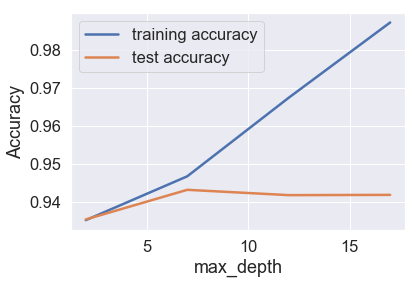

In [104]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], scores["mean_train_score"], label="training accuracy")
plt.plot(scores["param_max_depth"], scores["mean_test_score"], label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [105]:
parameters = {'min_samples_leaf': range(50, 400, 10)}
rf = RandomForestClassifier()

# fit on training data
rf = GridSearchCV(rf, parameters, cv=n_folds, scoring="accuracy")
rf.fit(X_lasso, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_leaf': range(50, 400, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

S:\AnacodaPy\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


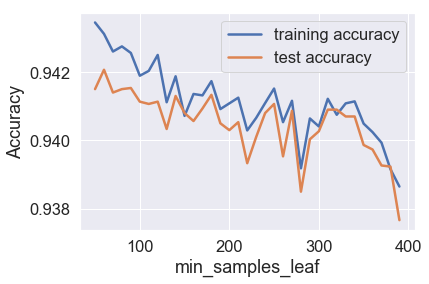

In [106]:
#  scores of GridSearch CV
scores = rf.cv_results_

# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], scores["mean_train_score"], label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], scores["mean_test_score"], label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [107]:
# parameters to build the model on
parameters = {'min_samples_split': range(100, 500, 25)}
rf = RandomForestClassifier()

# fit tree on training data
rf = GridSearchCV(rf, parameters, cv=n_folds, scoring="accuracy")
rf.fit(X_lasso, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_split': range(100, 500, 25)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

S:\AnacodaPy\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


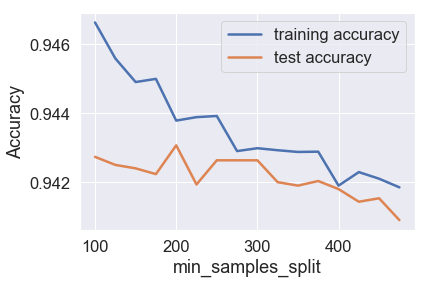

In [108]:
# scores of GridSearch CV
scores = rf.cv_results_

# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], scores["mean_train_score"], label="training accuracy")
plt.plot(scores["param_min_samples_split"], scores["mean_test_score"], label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [109]:
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 300, 100),
    'min_samples_split': range(200, 500, 100),
    'n_estimators': [500,700], 
    'max_features': [10,20,25]
}
# Create a based model
rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1,verbose = 1)

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

model_rf = RandomForestClassifier(bootstrap=True,max_depth=10, min_samples_leaf=100, min_samples_split=200, n_estimators=1000 ,
                                  oob_score = True, n_jobs = -1,random_state =50,max_features = 15,max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

# Make predictions
prediction_test = model_rf.predict(X_test)

In [111]:
# check metrics
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,prediction_test))
print(confusion_matrix(y_test,prediction_test))

             precision    recall  f1-score   support

          0       0.95      0.99      0.97      5493
          1       0.73      0.41      0.52       508

avg / total       0.93      0.94      0.93      6001

[[5415   78]
 [ 300  208]]


In [112]:
# accuracy score
print ('Accuracy Score for Random Forest:',metrics.accuracy_score(y_test, prediction_test))

Accuracy Score for Random Forest: 0.9370104982502916


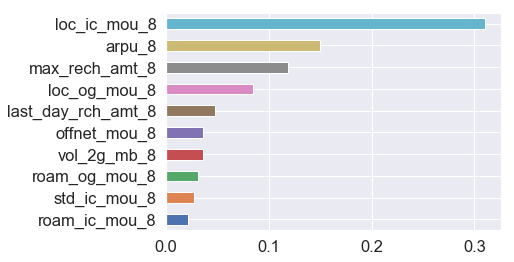

In [113]:
df = model_df
# Scaling all the variables to a range of 0 to 1
features = df.columns.values
df = pd.DataFrame(scaler.transform(df))
df.columns = features

importances = model_rf.feature_importances_
weights = pd.Series(importances,index=df.columns.values)
weights.sort_values()[-10:].plot(kind = 'barh')

In [114]:
#  Local Incoming for Month 8, Average Revenue Per Customer for Month 8 and Max Recharge Amount for Month 8 are the most 
# important predictor variables to predict churn.

# Random forest is the best algorithm so far.

In [ ]:
#       Pointers 
# Very Less High Value customers are churning
# Revenue Per Customer, Max Recharge Amount and Standard Outgoing Calls are strong indicators
# Most customers are relaively new ie. < 5. People with less than 4 Yrs of tenure have higher probability of churn
# Behaviour is 8 Month can be the base of Churn Analysis
# Local Incoming and Outgoing Calls for 8th Month and Average Revenue in 8th Month are strong indicators
# Random Forest is the best method to Predict Churn followed by others